# Исследование объявлений о продаже квартир

Цели исследования:

- Выяснить сколько обычно занимает продажа недвижимости? 
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Какие факторы больше всего влияют на стоимость квартиры?
- Выделить сегмент квартир в центре, отличаются ли они от общих выводов по всей базе?

## Изучение данных из файла

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('/anaconda_files/ya/p3_nedvizhimost/real_estate_data.csv',
                 sep='\t', parse_dates=['first_day_exposition'])

In [3]:
# первое знакомство с таблицей
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# смотрим на пропуски и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [5]:
# функция из воркшопа,
# ищет уникальные значения, выводит название и колличество уникальных значений

def describe_cols(df):

    values = pd.DataFrame()

    for col in df.columns:
        values[col] = [df[col].unique(), df[col].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'Кол-во уникальных значений'}, axis=1)

In [6]:
# применим функцию на дата фрейме
describe_cols(df)

,Значения,Кол-во уникальных значений
studio,"[False, True]",2
open_plan,"[False, True]",2
is_apartment,"[nan, False, True]",2
ponds_around3000,"[2.0, 0.0, 3.0, 1.0, nan]",4
parks_around3000,"[1.0, 0.0, 2.0, nan, 3.0]",4
balcony,"[nan, 2.0, 0.0, 1.0, 5.0, 4.0, 3.0]",6
rooms,"[3, 1, 2, 4, 5, 6, 0, 7, 11, 8, 14, 10, 15, 9,...",17
floor,"[8, 1, 4, 9, 13, 5, 6, 22, 26, 7, 3, 2, 11, 15...",33
floors_total,"[16.0, 11.0, 5.0, 14.0, 12.0, 26.0, 24.0, 27.0...",36
total_images,"[20, 7, 10, 0, 2, 6, 5, 18, 9, 1, 16, 11, 8, 1...",38


##### Вывод:
- нужно изменить некоторые названия колонок
- ceiling_height много пустых значений 
- floors_total поменять на int 
- is_apartment много пустых значений на первый взгляд имеет не верный формат, по заданию пропуски заменим на 0 предполагая что балкона нет 
- locality_name подробнее изучить столбец
- total_images колонка для анализа нам не поможет, возможно надо удалить

## Предобработка данных

### Испраление названия колонок

In [7]:
# исправляем названия колонок
df.rename(columns={'parks_around3000': 'parks_around_3000',
                   'ponds_around3000': 'ponds_around_3000',
                   'cityCenters_nearest': 'city_centers_nearest'},  inplace=True)

### Заполнение пропусков

In [8]:
# функция из воркшопа,
# проверяет неявные и явные пустые значения

def nan_values(df, list_nans=['', ' ', '""', '" "', "''", "' '", None, np.nan, pd.NA]):
    """
    функция проверят на явные и не явные пропуски, создает отдельный датафрейм
    """
    list_count = []
    list_share = []

    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(
            round(sum(df[col].isin(list_nans)) * 100 / df.shape[0], 2))

    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'num_missing': list_count,
                                     'percent_missing': list_share})
    return missing_value_df

In [9]:
# применим функцию
nan_values(df)

,column_name,num_missing,percent_missing
0,total_images,0,0.00
1,last_price,0,0.00
2,total_area,0,0.00
3,first_day_exposition,0,0.00
4,rooms,0,0.00
5,ceiling_height,9195,38.80
6,floors_total,86,0.36
7,living_area,1903,8.03
8,floor,0,0.00
9,is_apartment,20924,88.29


##### Вывод:
    ceiling_height          38% (высота потолков) - можно заменить медианой
    floors_total            0.3% (всего этажей в доме) - заменим на 1, предполагая что это частные дома, и 0 этажей быть не может.
    living_area              8% (жилая площадь в кв м) - не могу заполнить ничем. 
    is_apartment            88% (апартаменты) - скорее всего False, так же как с балконами, если не указано значит не аппартаменты
    kitchen_area             9% (площадь кухни) - возможно квартиры студии без кухни, скорее всего 0
    balcony                 48% (балкон) - не указан балкона нет, заменить на 0
    locality_name           0.2% (название населенного пункта) - полностью удалить, не значительные потери данных
    
******

Эти колонки заполняла программа автоматически, пустые параметры трогать не буду. 

    airports_nearest        23% (расстояние до аэропорта) 
    city_centers_nearest    23% (расстояние до центар города)
    parks_around_3000       23% (число парков в радиусе 3км)
    parks_nearest           65% (расстояние до ближайшего парка)
    ponds_around_3000       23% (число водоемов в радиусе 3 км)
    ponds_nearest           61% (расстояние до ближайшего водоема)
    
    days_exposition         13% (сколько дней было размещено объявление от публикации до снятия) скорее всего еще продается

In [10]:
# заменяем пропуски высоты потолка на медиану
df['ceiling_height'] = df['ceiling_height'].fillna(
    df['ceiling_height'].median())

In [11]:
# заменяем пропуски этажа на 1
df['floors_total'] = df['floors_total'].fillna(1)

In [12]:
# заменим аппартаменты там где пусто False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [13]:
# меняем там где студия на 0 а там где не студия на медиану
df['kitchen_area'] = (
    df['kitchen_area']
    .where(df['studio'] == False, df['kitchen_area'].fillna(0))
    .fillna(df['kitchen_area'].median())
)

In [14]:
# меням пропуски на 0 балконов
df['balcony'] = df['balcony'].fillna(0)

In [15]:
# удаляем строки там где пропущенно назване города
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

### Исправление тип данных

In [16]:
# приведем колонки к типу Int64 чтобы можно было работать с пропусками как с числами
df['last_price'] = df['last_price'].astype('Int64')
df['rooms'] = df['rooms'].astype('Int64')
df['floors_total'] = df['floors_total'].astype('Int64')
df['balcony'] = df['balcony'].astype('Int64')
df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['city_centers_nearest'] = df['city_centers_nearest'].astype('Int64')
df['parks_around_3000'] = df['parks_around_3000'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around_3000'] = df['ponds_around_3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')

In [17]:
# округляем чтобы поменять тип на Int64 (через Try Except в ином случае вызывает ошибку)
try:
    df['days_exposition'] = df['days_exposition'].round()
except:
    pass

In [18]:
# меняем на Int64
df['days_exposition'] = df['days_exposition'].astype('Int64')

In [19]:
# меняем тип данных
df['total_area'] = df['total_area'].astype('float32')
df['ceiling_height'] = df['ceiling_height'].astype('float32')
df['living_area'] = df['living_area'].astype('float32')
df['kitchen_area'] = df['kitchen_area'].astype('float32')

##### Вывод:
нужно было преобразовать именно в Int64 чтобы можно было работать с пустыми значениями как с числами.

### Поиск и исправление аномалий

In [20]:
# поиск явных дубликатов
df.duplicated().sum()

0

In [21]:
# применим дискрайб и трансформацию с округлением
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,10.0,6.0,0.0,6.0,9.0,14.0,50.0
last_price,23650.0,6541127.0,10896399.0,12190.0,3400000.0,4650000.0,6799000.0,763000000.0
total_area,23650.0,60.0,36.0,12.0,40.0,52.0,70.0,900.0
rooms,23650.0,2.0,1.0,0.0,1.0,2.0,3.0,19.0
ceiling_height,23650.0,3.0,1.0,1.0,3.0,3.0,3.0,100.0
floors_total,23650.0,11.0,7.0,1.0,5.0,9.0,16.0,60.0
living_area,21752.0,34.0,22.0,2.0,19.0,30.0,42.0,410.0
floor,23650.0,6.0,5.0,1.0,2.0,4.0,8.0,33.0
kitchen_area,23650.0,10.0,6.0,0.0,7.0,9.0,11.0,112.0
balcony,23650.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0


##### Вывод:
- last_price минимальная стоимость 12 900 
- rooms 0 комнат это странно 19 комнат тоже странно но может быть, комнат 0 быть не может надо заменить на 1
- ceiling_height высота потолков мин 1 и max 100 аномальные значения
- living_area комната 2 кв метра возможно это какие то подсобные помещения... 
- balcony смотрим у кого 4 и более балконов

In [22]:
# проверим что за недвижимость за 12 900
df.query('last_price < 100000')

# 109 кв метра за очень низкую цену, скорее всего эти данные не верны.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8778,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421,9176,1,805,0,<NA>,8


In [23]:
# удалим выброс
df = df.drop(df[df['last_price'] < 100000].index)

In [24]:
# посмотрим сколько объектов имеет 0 комнат
df.query('rooms == 0').shape[0]

197

In [25]:
# заменим 0 комнат на 1 комнату
df.loc[df['rooms'] == 0, 'rooms'] = 1

In [26]:
# посмотрим на низкие и высокие потолки
df.query(
    'ceiling_height >= 0 and ceiling_height < 2.4 or ceiling_height > 4').shape[0]
# при анализе обнаружил 96 аномальных значений в диапазоне заменим их на медиану

96

In [27]:
# заменим аномальные значения в столбце высота потолков
df.loc[df['ceiling_height'] <= 2.4,
       'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] > 4, 'ceiling_height'] = df['ceiling_height'].median()

In [28]:
# посомтрим что за объекты где жилая площадь меньше 3х кв метров
df.query('living_area <= 3').shape[0]
# не могу сделать однозначных выводов, возможно это какие то исключения
# возможно связанно с законодательством. с этими данными делать ничего не буду

4

In [29]:
# посмотирм объекты с 5 и более балконами
df.query('balcony >= 5').shape[0]
# субъективно балконов много, но возможно это какие то необычные дома...

304

## Расчёты и добавление результатов в таблицу

In [30]:
# добавляем в таблицу цену за 1 кв метр и меняем на целое число
df['price_area'] = df['last_price'] / df['total_area']
df['price_area'] = df['price_area'].astype('Int64')

In [31]:
# добавим столбец день недели
df['weekday'] = df['first_day_exposition'].dt.weekday

In [32]:
# добавим столбец месяц
df['month'] = df['first_day_exposition'].dt.month

In [33]:
# добавим столбец год
df['year'] = df['first_day_exposition'].astype('datetime64[Y]')

In [34]:
# сделамем столбец по этажам
df['floor_group'] = df['floor']
df['floor_group'] = df['floor_group'].where(df['floor'] != 1, 'первый')
df['floor_group'] = df['floor_group'].where(
    df['floor'] != df['floors_total'], 'последний')
df['floor_group'] = df['floor_group'].where(
    (df['floor_group'] == 'первый') | (df['floor_group'] == 'последний'), 'другие')

In [35]:
# столбец отношение жилой к общей площади
df['living_total_percent'] = df['living_area'] / df['total_area'] * 100

In [36]:
# столбец отношение кухни к общей площади
df['kitchen_total_percent'] = df['kitchen_area'] / df['total_area'] * 100

## Исследовательский анализ данных

### Построение гистограмм для: площадь, цена, число комнат, высота потолков.

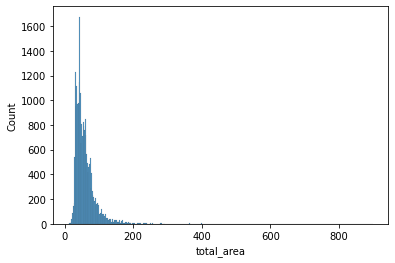

In [37]:
# гистограмма общей площади
sns.histplot(data=df, x='total_area')
plt.show()

##### Вывод:
отфильтровать в значениях от 30 до 200

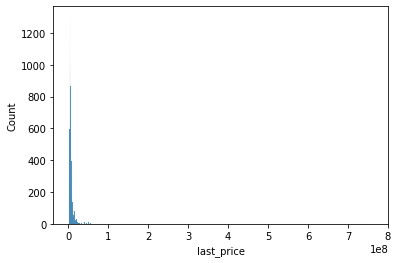

In [38]:
# гистограмма стоимости объектов недвижимости
sns.histplot(data=df, x='last_price')
plt.show()

##### Вывод: 
убрать большой хвост

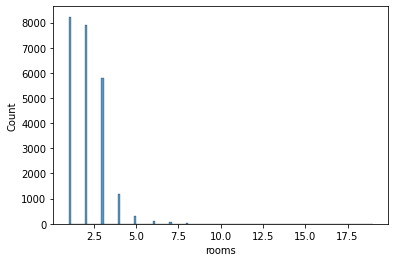

In [39]:
# гистограмма колличества комнат
sns.histplot(data=df, x='rooms')
plt.show()

##### Вывод: 
оставить квартиры где 5 и менее комнат.

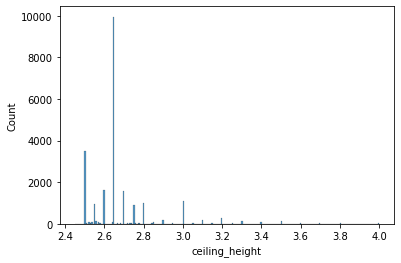

In [40]:
# гистограмма высоты потолков
sns.histplot(data=df, x='ceiling_height')
plt.show()

##### Вывод:
оставить только потолки от 2.5 до 3.2 метра

### Время продажи объектов недвижимости

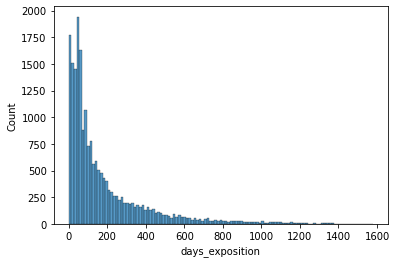

In [41]:
# гистограмма дней продажи
sns.histplot(data=df, x='days_exposition')
plt.show()

##### Вывод: 
ограничим график до года

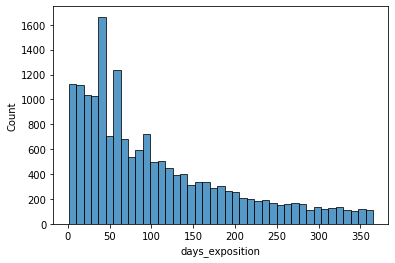

In [42]:
# гистограмма дней продажи отфильтрованная по дням продажи не более 365 дней
sns.histplot(data=df.query('days_exposition <= 365'), x='days_exposition')
plt.show()

In [43]:
filtered_exposition = df[df['days_exposition'] <= 365]['days_exposition']
print('Медиана', round(filtered_exposition.median()))
print('Среднее', round(filtered_exposition.mean()))

Медиана 74
Среднее 105


##### Вывод: 
- В первые 50 дней очень много продаж, есть всплески на 70й день и 90й день
- Быстрой продажей можно считать все что продается в первые 30 дней, а все что больше 95 дней можно считать долгой.

### Фильтрация редких и выбивающихся значений из графиков

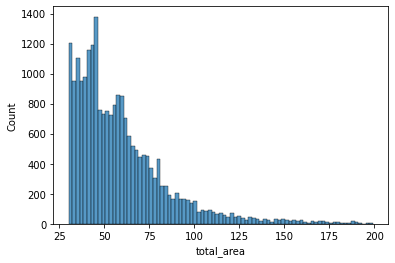

In [44]:
# гистограмма общей площади
sns.histplot(data=df.query(
    'total_area > 30 and total_area < 200'), x='total_area')
plt.show()

##### Вывод: 
после фильтрации значений, самые распостраненные объекты недвижимости имеют общую площать от 45 до 55 кв метров

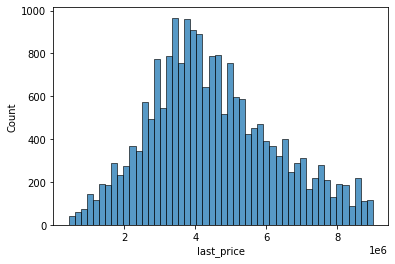

In [45]:
# гистограмма стоимости объектов недвижимости
sns.histplot(data=df.query('last_price < 9000000'), x='last_price')
plt.show()

##### Вывод: 
ограничив значение 9 млн, самые распостраненные объекты стоимостью от 3 до 5 млн.

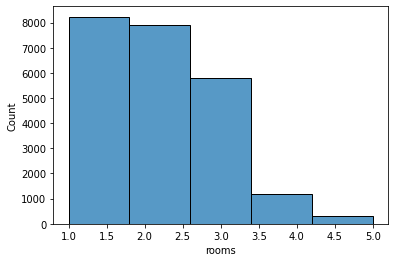

In [46]:
# гистограмма колличества комнат
sns.histplot(data=df.query('rooms <= 5'), x='rooms', bins=5)
plt.show()

##### Вывод:
- 1 комнатные квартиры самые распотраненные
- на втором месте 2х комнатные
- на третьем 3х комнатные
- вместе они занимаю большу часть рынка. 

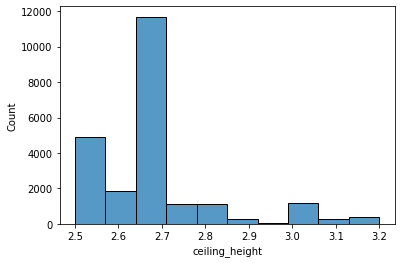

In [47]:
# гистограмма высоты потолков
sns.histplot(data=df.query(
    'ceiling_height >= 2.5 and ceiling_height <= 3.2'), x='ceiling_height', bins=10)
plt.show()

##### Вывод: 
можно сказать, что нормой является потолок высотой 2.5 - 2.7 метра

### Факторы влияющие на стоимость квартир

In [48]:
# создадим столбец с группировкой по стоимости
df['price_group'] = pd.cut(df['last_price'], [
                           0, 2000000, 4000000, 6000000, 8000000, 10000000, 15000000, np.inf])

In [49]:
# зависимость цены от площади
df.groupby('price_group')['total_area'].agg(['count', 'mean', 'median'])

,count,mean,median
price_group,,,
"(0.0, 2000000.0]",1449,41.798897,41.000000
"(2000000.0, 4000000.0]",7632,41.589184,39.000000
"(4000000.0, 6000000.0]",7259,53.063263,51.299999
"(6000000.0, 8000000.0]",3126,66.963989,66.000000
"(8000000.0, 10000000.0]",1470,80.311531,79.000000
"(10000000.0, 15000000.0]",1513,98.160873,94.900002
"(15000000.0, inf]",1200,156.339355,135.850006


<AxesSubplot:xlabel='price_group'>

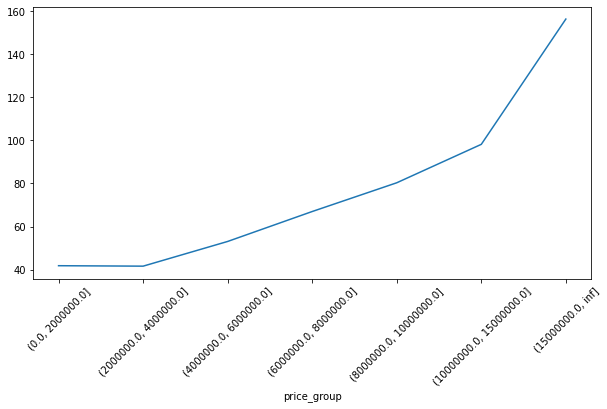

In [50]:
# зависимость цены от площади
df.groupby('price_group')['total_area'].mean().plot(rot=45, figsize=(10, 5))

##### Вывод: 
- 3х комнатная квартира выйдет дешевле чем 2х или 1 комнатная, если считать по цене за квадратный метр
- одна из самых дорогих квартир это 1 комнатная, она дороже 19 комнатной квартиры.

In [51]:
df.groupby('rooms')['last_price'].agg(['count', 'median']).head(10)

,count,median
rooms,,
1,8233,3585000.0
2,7923,4770338.0
3,5797,6200000.0
4,1175,9000000.0
5,326,14000000.0
6,105,19000000.0
7,59,24900000.0
8,12,23095000.0
9,8,23750000.0


<AxesSubplot:xlabel='rooms'>

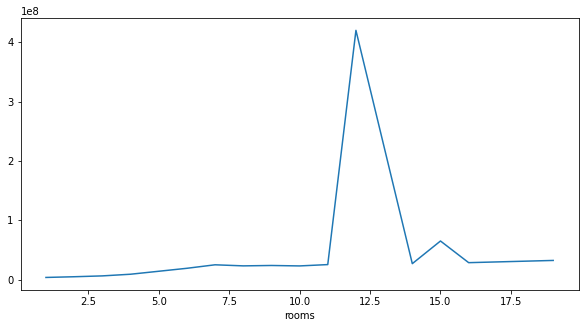

In [52]:
# зависимсоить цены от числа комнат
df.groupby('rooms')['last_price'].median().plot(figsize=(10, 5))

##### Вывод:
- самая доступная для покупки это 1 комнатная
- чем больше комнат тем больше цена.

In [83]:
# зависимость цены от центра
df.groupby('spb_centr_km')['last_price'].agg(['count', 'median']).head(10)

,count,median
spb_centr_km,,
0,86,11750000.0
1,240,10835000.0
2,307,9500000.0
3,526,8500000.0
4,907,9900000.0
5,769,8920262.0
6,470,8005000.0
7,407,7500000.0
8,670,6500000.0


<AxesSubplot:xlabel='spb_centr_km'>

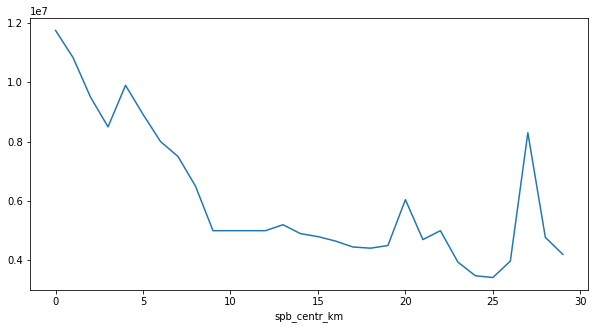

In [84]:
# зависимость цены от центра
df.groupby('spb_centr_km')['last_price'].median().plot(figsize=(10, 5))

##### Вывод: 
чем ближе к центру города тем выше цена.

In [ ]:
# зависимость цены от этажа
df.groupby('floor_group')['last_price'].agg(['count', 'median'])

In [ ]:
# зависимость цены от этажа
df.groupby('floor_group')['last_price'].median().plot(figsize=(10, 5))

##### Вывод: 
- первый этаж, самый дешевый
- последний дешевле остальных, но дороже первого. 

In [ ]:
# зависимость цены от года
df.groupby('year')['last_price'].agg(['count', 'median'])

In [ ]:
# зависимость цены от года
df.groupby('year')['last_price'].median().plot(figsize=(10, 5))

##### Вывод: 
- 2014 год лучше не брать для оценки, так как мало объектов
- с 2016 - 2018 недвижимость подешевела в сравнении с 2015
- в 2019 вновь подоражала и вернулась к отметке 2015 года

In [ ]:
# зависимость цены от месяца
df.groupby('month')['last_price'].agg(['count', 'median'])

<AxesSubplot:xlabel='month'>

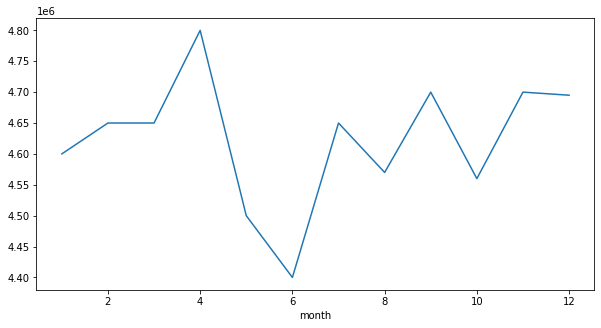

In [55]:
# зависимость цены от месяца
df.groupby('month')['last_price'].median().plot(figsize=(10, 5))

#####  Вывод: 
- больше всего продаж в феврале и марте
- меньше всего в мае и январе
- дороже всего можно продать в апреле
- в июне продавать не стоит

In [57]:
# зависимость цены от дня недели
df.groupby('weekday')['last_price'].agg(['count', 'median'])

,count,median
weekday,,
0,3606,4650000.0
1,4175,4720000.0
2,3965,4700000.0
3,4286,4650000.0
4,3992,4577500.0
5,1933,4575000.0
6,1692,4550000.0


<AxesSubplot:xlabel='weekday'>

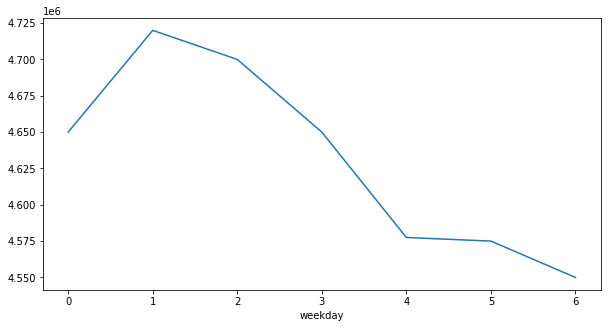

In [58]:
df.groupby('weekday')['last_price'].median().plot(figsize=(10, 5))

##### Вывод: 
- лучше всего продаются в четверг
- дороже всего во вторник
- продавать в воскресенье плохая идея

In [59]:
# помотрим на кореляцию Пирсона
df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.653808,0.365292,-0.206911
total_area,0.653808,1.000000,0.760678,-0.231877
rooms,0.365292,0.760678,1.000000,-0.186458
city_centers_nearest,-0.206911,-0.231877,-0.186458,1.000000


##### Вывод:
1. цена и общ площать, корреляция умеренная говорит о том что стоимость квартиры зависит от общей площади
2. цена и колличество комнат, корреляция слабая, говорит о том что цена не сильно меняется от колличетва комнат
3. цена и удаление от центра, корреляция слабая отрицательная, говорит о том что при увеличении цены расстояние от центра уменьшается

4. общ площадь и число команат, сильная кореляция, значит что при росте площади увеличивается число комнат
5. общ площадь и расстояние от центра, кор слабая, значит что при увеличении площади расстояние от центра уменьшается

6. комнаты и расстояние от центра, кор отрицательная очень слабая, при увеличении количетсва комнат, расстояние от центра уменьшается

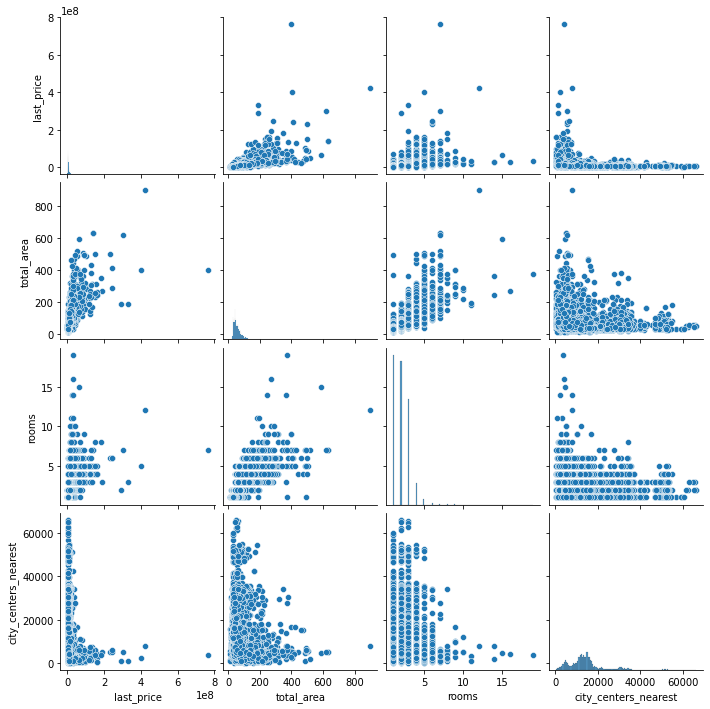

In [60]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.show()

### Населенные пункты с наибольшим числом объявлений

In [61]:
# изменим регистр всех названий городов
df['locality_name'] = df['locality_name'].str.lower()

In [62]:
# 10 населённых пунктов с населённые пункты с самой высокой стоимостью жилья.
top_ten = (df.groupby('locality_name')['price_area']
           .agg(['count', 'median'])
           .sort_values(by='count', ascending=False)
           .head(10)
           )

display(top_ten)

,count,median
locality_name,,
санкт-петербург,15720,104765.5
посёлок мурино,522,85878.0
посёлок шушары,440,76876.0
всеволожск,398,65789.0
пушкин,369,100000.0
колпино,338,74723.5
посёлок парголово,327,91642.0
гатчина,307,67796.0
деревня кудрово,299,91860.0


<AxesSubplot:ylabel='median'>

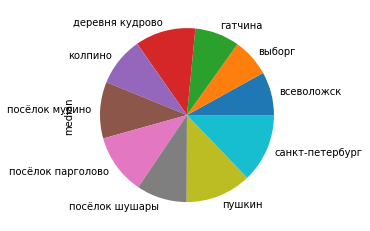

In [63]:
# 10 населённых пунктов с населённые пункты с самой высокой стоимостью жилья.
top_ten.reset_index().groupby('locality_name')['median'].sum().plot(kind='pie')

##### Вывод:
- у Санкт-Петербурга в 30 раз больше объявлений
- самая низкая цена кв метра в городе Выборг
- самая высокая стоимость в Санкт-Петербурге 

### График изменения стоимости при удаленности от центра

In [64]:
# колонка с расстоянием от центра в км
df['spb_centr_km'] = df['city_centers_nearest']
df['spb_centr_km'] = df['spb_centr_km'].where(
    df['locality_name'] == 'санкт-петербург', pd.NA)
df['spb_centr_km'] = (df['spb_centr_km'] / 1000).astype('Int64')

In [65]:
# средняя цена для каждого киллометра
pivot_mean_km = df.pivot_table(
    index='spb_centr_km', values='last_price', aggfunc=['count', 'mean'])
pivot_mean_km.columns = ['Количество', 'Средняя цена в млн.']
pivot_mean_km['Средняя цена в млн.'] = (
    pivot_mean_km['Средняя цена в млн.'] / 1000000)
display(pivot_mean_km.head(10))

,Количество,Средняя цена в млн.
spb_centr_km,,
0,86,23.442315
1,240,18.850852
2,307,16.163314
3,526,13.436831
4,907,13.632025
5,769,15.306121
6,470,14.389106
7,407,12.797674
8,670,8.445272


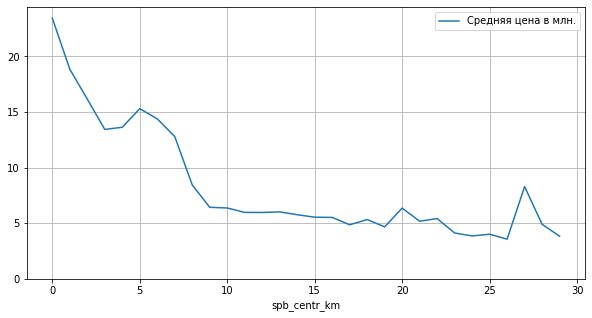

In [66]:
# график изменения цены в зависимсоти от расстояния до центра
pivot_mean_km.plot(y='Средняя цена в млн.', figsize=(10, 5), grid=True, ylim=0)
plt.show()

#### Вывод:
- исходя из графика, центральной зоной считается все в пределах от 0 до 7 км, где стоимость в предлеах 23 - 13 млн. 
- в радиусе 1км самые дорогие квартиры
- на 3м киллометре стоимость квартиры почти в 2 раза ниже чем на 0
- на 6 и 5 км, квартиры дороже чем на 3 и 4 км
- в радиусе 1 км меньше всего хотят продать квартиру, больше всего хотят продать на 4 км

###  Анализ центра СПБ и сравнение по всему району

In [81]:
# сделаем таблицу центр
df_center = df.query('spb_centr_km <= 7').reset_index(drop=True)

In [82]:
# сравнительная таблица цены центра города и всего района по годам
pivot_spb_year = df_center.pivot_table(index=['year'], values=[
                                       'last_price'], aggfunc=['count', 'median']).reset_index()
pivot_spb_year.columns = ['Year', 'QTY centr', '$ center']
pivot_spb_year['$ center'] = pivot_spb_year['$ center'] / 1000000

pivot_year = df.pivot_table(index=['year'], values=['last_price'], aggfunc=[
                            'count', 'median']).reset_index()
pivot_year.columns = ['Year', 'QTY', '$']
pivot_year['$'] = pivot_year['$'] / 1000000

pvt_merge = pivot_year.merge(pivot_spb_year, how='left', on='Year')
pvt_merge

,Year,QTY,$,QTY centr,$ center
0,2014-01-01,136,7.64,27,19.8
1,2015-01-01,1173,5.35,328,9.995
2,2016-01-01,2765,4.55,522,9.4
3,2017-01-01,8185,4.5,1331,8.99
4,2018-01-01,8512,4.55,1103,8.75
5,2019-01-01,2878,5.05,401,9.476


<AxesSubplot:>

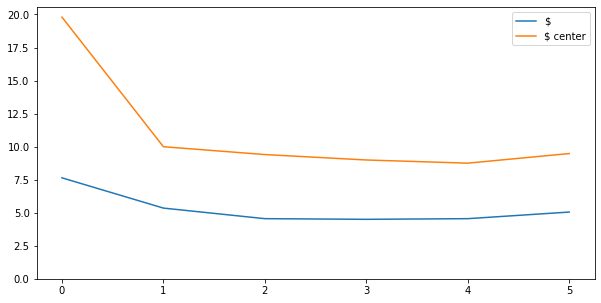

In [69]:
# отношение цены к расстоянию от центра по годам
pvt_merge.plot(y=['$', '$ center'], figsize=(10, 5), ylim=0)

##### Вывод 
- в центре города средняя стоимость квартир в 2 раза выше чем средняя стоимость квартир по всему району
- в 2014 слишком мало данных, но даже по ним можно сделать осторожный вывод о том что в 2015 цены на недвижимость сильно снизились
- стоимость квартир падала с 2015 до 2017, и росла с 2018 по 2019
- больше всего недвижимости продавалось в 2017 и 2018 годах как в центре так и по всему району.

In [70]:
# сравнительная таблица центра города и всего района по
# высоте потолков, комнат, площади
pivot_spb_values = df_center.pivot_table(
    index=['year'],
    values=['total_area', 'rooms', 'ceiling_height'],
    aggfunc=['median']).reset_index()
pivot_spb_values.columns = [
    'Year', 'Ceiling center', 'Rooms center', 'Area center']

pivot_values = df.pivot_table(
    index=['year'],
    values=['total_area', 'rooms', 'ceiling_height'],
    aggfunc=['median']).reset_index()
pivot_values.columns = ['Year', 'Ceiling', 'Rooms', 'Area']

pvt_values = pivot_values.merge(pivot_spb_values, how='left', on='Year')
pvt_values

,Year,Ceiling,Rooms,Area,Ceiling center,Rooms center,Area center
0,2014-01-01,2.65,3.0,76.18,2.65,3.0,115.699997
1,2015-01-01,2.65,2.0,60.00,2.70,3.0,87.000000
2,2016-01-01,2.65,2.0,53.02,2.65,3.0,82.000000
3,2017-01-01,2.65,2.0,52.00,2.70,3.0,77.800003
4,2018-01-01,2.65,2.0,50.50,2.84,3.0,74.000000
5,2019-01-01,2.65,2.0,52.00,3.00,3.0,73.900002


<AxesSubplot:>

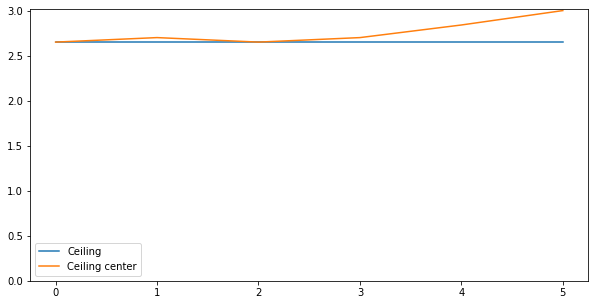

In [71]:
# высота потолков
pvt_values.plot(y=['Ceiling', 'Ceiling center'], figsize=(10, 5), ylim=0)

<AxesSubplot:>

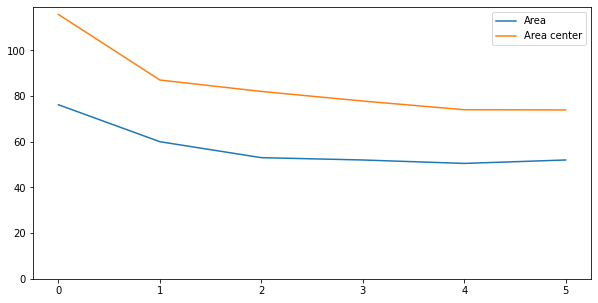

In [72]:
# общая площадь
pvt_values.plot(y=['Area', 'Area center'], figsize=(10, 5), ylim=0)

##### Вывод
- высота потолков в центре в среднем выше на 0.5 метра
- недвижимость в центре как правило на одну комнату больше, а площать квартир начиная с 2016 почти в 2 раза больше

In [73]:
# сравнительная таблица цены центра города и всего района по количеству комнат
pivot_spb_room = df_center.pivot_table(
    index='rooms', values='last_price', aggfunc=['count', 'median'])
pivot_spb_room.columns = ['QTY center', '$ center']
pivot_room = df.pivot_table(
    index='rooms', values='last_price', aggfunc=['count', 'median'])
pivot_room.columns = ['QTY', '$']
p = pivot_room.merge(pivot_spb_room, how='left', on='rooms')
p

,QTY,$,QTY center,$ center
rooms,,,,
1,8233,3585000.0,578,5900000.0
2,7923,4770338.0,1101,7650000.0
3,5797,6200000.0,1150,9990000.0
4,1175,9000000.0,503,12300000.0
5,326,14000000.0,218,14945000.0
6,105,19000000.0,84,19500000.0
7,59,24900000.0,54,24900000.0
8,12,23095000.0,11,22190000.0
9,8,23750000.0,3,29000000.0


<AxesSubplot:xlabel='rooms'>

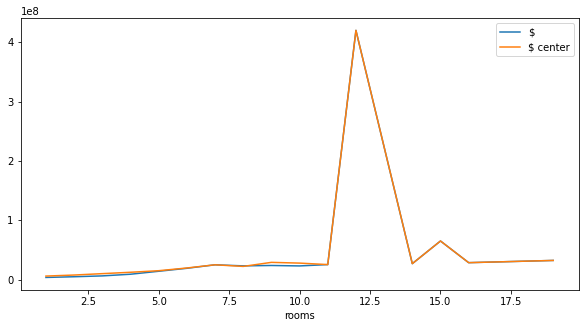

In [74]:
p.plot(y=['$', '$ center'], figsize=(10, 5))

##### Вывод
- в центральном районе в лидерах 3х и 2х комнатные квартиры
- а по всему району лидируют 1 комнатные и 2 комнатные

In [75]:
# сравнительная таблица цены центра города и всего района по этажности
pivot_spb_floor = df_center.pivot_table(
    index='floor_group', values='last_price', aggfunc=['count', 'median'])
pivot_spb_floor.columns = ['QTY center', '$ center']
pivot_floor = df.pivot_table(
    index='floor_group', values='last_price', aggfunc=['count', 'median'])
pivot_floor.columns = ['QTY', '$']
pvt_floor = pivot_floor.merge(pivot_spb_floor, how='left', on='floor_group')
pvt_floor

,QTY,$,QTY center,$ center
floor_group,,,,
другие,17408,4850000.0,2653,9500000.0
первый,2884,3900000.0,407,6550000.0
последний,3357,4300000.0,652,9175000.0


<AxesSubplot:xlabel='floor_group'>

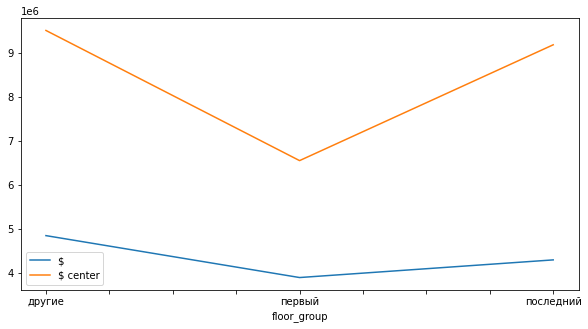

In [76]:
# стоимость этажа центра города и всего района
pvt_floor.plot(y=['$', '$ center'], figsize=(10, 5))

##### Вывод
- и в центре и по всему району самые доступные квартиры на первом этаже
- если в центральной части последний этаж ценится почти так же, как и все другие этажи, кроме первого, то по всему району последний этаж не так популярен в сравнении с другими, кроме первого

In [77]:
# таблица зависимости цены к удаленности от центра
pivot_spb_km = df_center.pivot_table(
    index='spb_centr_km', values='last_price', aggfunc=['count', 'median'])
pivot_spb_km.columns = ['QTY center', '$ center']
pivot_spb_km

,QTY center,$ center
spb_centr_km,,
0,86,11750000.0
1,240,10835000.0
2,307,9500000.0
3,526,8500000.0
4,907,9900000.0
5,769,8920262.0
6,470,8005000.0
7,407,7500000.0


<AxesSubplot:xlabel='spb_centr_km'>

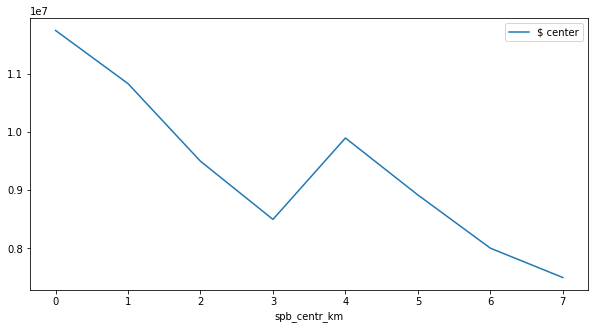

In [78]:
pivot_spb_km.plot(y='$ center', figsize=(10, 5))

##### Вывод
- чем дальше от центра тем дешевле недвижимость
- скачек стоимости на 4м км

In [79]:
# помотрим на кореляцию Пирсона
df_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.636407,0.334306,-0.048304
total_area,0.636407,1.000000,0.739093,-0.105105
rooms,0.334306,0.739093,1.000000,-0.176559
city_centers_nearest,-0.048304,-0.105105,-0.176559,1.000000


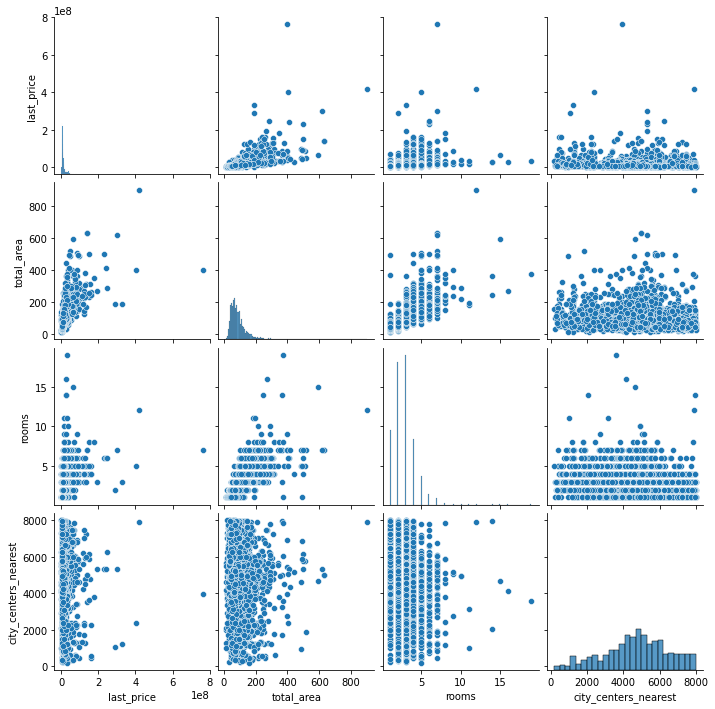

In [80]:
sns.pairplot(
    df_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.show()

## Общий вывод

С какими данными мы работали и что сделали? 

- Дана база данных стоимости квартир в СПБ и ближайших районов с 2015 по 2019 года. В датасете имелись пропущенные значения, данные по высоте потолков земенены медианой, данные что были меньше 1% - удалены как статистически не значимые. Проведена работа с аномалиями, потолки высотой 1 метр, заменены на медиану, стомиость квартиры за 12 000р удалена. Добавлены недостающие данные в таблицу, этажность продаваемой квартиры разделена на категории (первый, последний, другие). Добавлен условный центр города с недвижимостью в радиусе 7км. Выяснили за сколько дней продается квартира, что считать быстрой продажей а что медленной. Выделены населенные пункты с наибольшим количеством объявлений. Проанализированы факторы влияющие на цену недвижимости, отдельно проанализирован центр в радиусе 7км. 

    Выяснить сколько обычно занимает продажа недвижимости?
- В среднем продажа недвижимости по всему району занимает 74 дня, прием основная часть продаж происходит в первые  50 дней.
******
    Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Быстрой продажей можно считать все что было продано в первые 50 дней. Долгой продажей можно считать объекты которые продаются более 95 дней.
******
    Какие факторы больше всего влияют на стоимость квартиры?
- Больше всего на стоимость квартиры влияет удаленность от центра города. Самый дешевый вариант на первом этаже. Самая дорогая квартира если считать по квадратному метру - 1 комнатная квартира, но она же и остается самой доступной из всех, из за меньшего метража. Дороже всего квартиру можно продать в апрельский вторник, а в воскресение июня продавать квартиру не стоит. Самые дорогие квартиры в городе Санк-Петербург, в городе Выборг много не дорогих варинатов. 
******
    Выделить сегмент квартир в центре, отличаются ли они от общих выводов по всей базе?
- В центре города средняя стоимость квартир в 2 раза выше, чем средняя стоимость квартир по всему району. Высота потолков в центре в среднем выше на 0.5 метра. Недвижимость в центре, как правило на одну комнату больше, а площать квартир начиная с 2016 почти в 2 раза больше. В центральном районе в лидерах 3х и 2х комнатные квартиры